## Problem 2: Python code exercise

In [1]:
# use make_moons to generate data
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

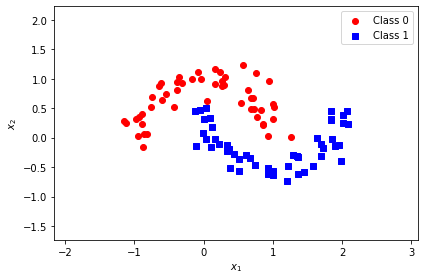

In [2]:
# generate raw data
X, y = make_moons(n_samples=100, noise=0.15, random_state=0)
plt.scatter(X[y == 0, 0], X[y == 0, 1],
            c='r', marker='o', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1],
            c='b', marker='s', label='Class 1')
plt.xlim(X[:, 0].min()-1, X[:, 0].max()+1)
plt.ylim(X[:, 1].min()-1, X[:, 1].max()+1)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [3]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [4]:
# generate training and testing data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)

In [5]:
#  Standardize data
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [6]:
import numpy as np
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

In [7]:
from sklearn.metrics import accuracy_score

In [8]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    edgecolor='black',
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

### (a) KNN classiﬁcation :
Please implement a KNN classiﬁer in scikit-learn using a Euclidean distance metric where K = 11.

[KNN]
Misclassified samples: 1
Accuracy: 0.95


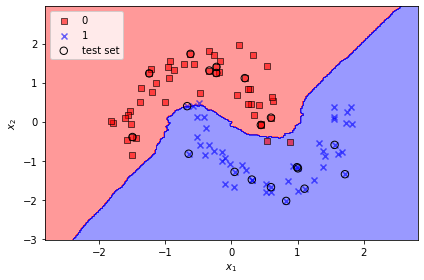

In [9]:
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
from sklearn.neighbors import KNeighborsClassifier
# p=2 and metric='minkowski' means the Euclidean Distance
knn = KNeighborsClassifier(n_neighbors=11, p=2, metric='minkowski')

knn.fit(X_train_std, y_train)
y_pred = knn.predict(X_test_std)
print('[KNN]')
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

# plot decision regions for knn classifier
plot_decision_regions(X_combined_std, y_combined,
                      classifier=knn, 
                      test_idx=range(y_train.size,
                                     y_train.size + y_test.size))
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### (b) SVM classiﬁer :
Please implement a SVM classiﬁer in scikit-learn using ’rbf’ kernel where random state = 0, γ = 0.2, and C = 10.0. 

[SVM]
Misclassified samples: 1
Accuracy: 0.95


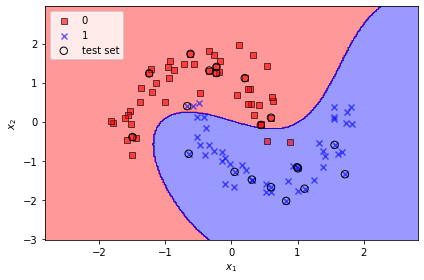

In [10]:
from sklearn.svm import SVC
#設定SVM C=10和'rbf'kernel和γ=0.2
svm = SVC( C=10.0 , kernel='rbf', gamma=0.2)
svm.fit(X_train_std, y_train)
y_pred = svm.predict(X_test_std)
print('[SVM]')
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

# plot decision regions for knn classifier
plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, 
                      test_idx=range(y_train.size,
                                     y_train.size + y_test.size))
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### (c) SVM classiﬁer :
Please implement a SVM classiﬁer in scikit-learn using ’linear’ kernel where C = 1000.0 and random state = 0.

[SVM]
Misclassified samples: 3
Accuracy: 0.85


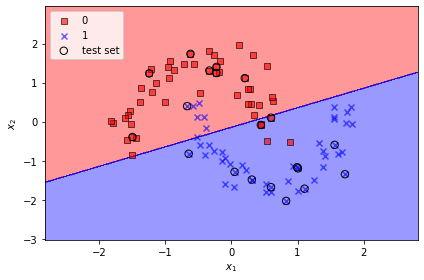

In [11]:
from sklearn.svm import SVC
#設定SVM C=1000和'linear'kernel
svm = SVC( C=1000.0 , kernel='linear', random_state=0)
svm.fit(X_train_std, y_train)
y_pred = svm.predict(X_test_std)
print('[SVM]')
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

# plot decision regions for knn classifier
plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, 
                      test_idx=range(y_train.size,
                                     y_train.size + y_test.size))
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### (d) SVM classiﬁer:
Please implement a SVM classiﬁer in scikit-learn using ’sigmoid’ kernel. 

[SVM]
Misclassified samples: 4
Accuracy: 0.80


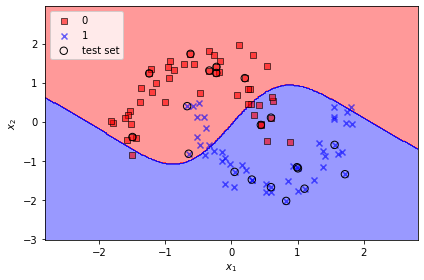

In [12]:
from sklearn.svm import SVC
#設定SVM使用sigmoid核
svm = SVC(kernel='sigmoid')
svm.fit(X_train_std, y_train)
y_pred = svm.predict(X_test_std)
print('[SVM]')
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

# plot decision regions for knn classifier
plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, 
                      test_idx=range(y_train.size,
                                     y_train.size + y_test.size))
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### (e) 全部數據:
Given C ∈ {0.1,1.0,10.0,100.0,1000.0,10000.0} and γ ∈ {0.00001,0.0001,0.001,0.01,0.1,1.0}, please ﬁnd the best combination of (C,γ) for default SVM classiﬁer with random state = 0 in scikit-learn.

-------------------------------------------------------
C = 0.100000 gamma = 0.000010
Misclassified samples: 11
Accuracy: 0.45


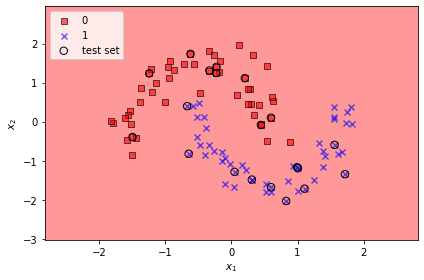

-------------------------------------------------------
C = 0.100000 gamma = 0.000100
Misclassified samples: 11
Accuracy: 0.45


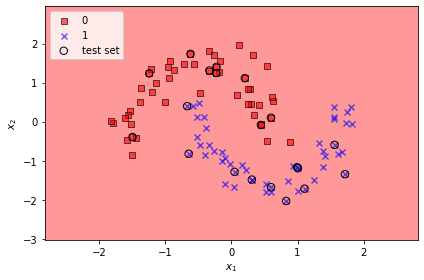

-------------------------------------------------------
C = 0.100000 gamma = 0.001000
Misclassified samples: 11
Accuracy: 0.45


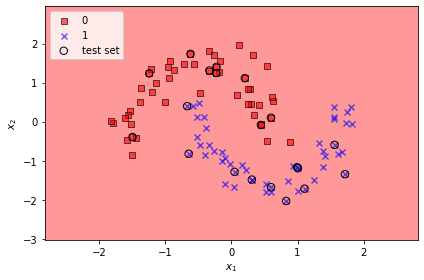

-------------------------------------------------------
C = 0.100000 gamma = 0.010000
Misclassified samples: 11
Accuracy: 0.45


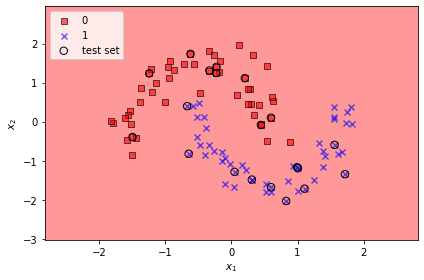

-------------------------------------------------------
C = 0.100000 gamma = 0.100000
Misclassified samples: 3
Accuracy: 0.85


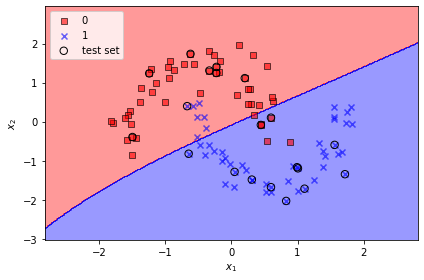

-------------------------------------------------------
C = 0.100000 gamma = 1.000000
Misclassified samples: 1
Accuracy: 0.95


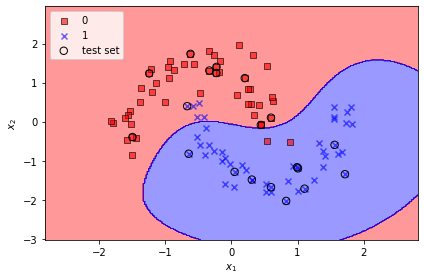

-------------------------------------------------------
C = 1.000000 gamma = 0.000010
Misclassified samples: 11
Accuracy: 0.45


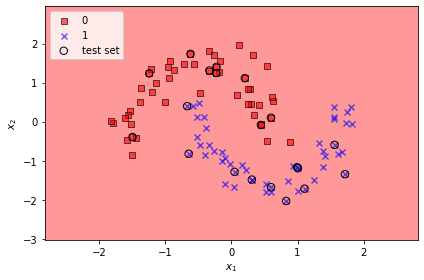

-------------------------------------------------------
C = 1.000000 gamma = 0.000100
Misclassified samples: 11
Accuracy: 0.45


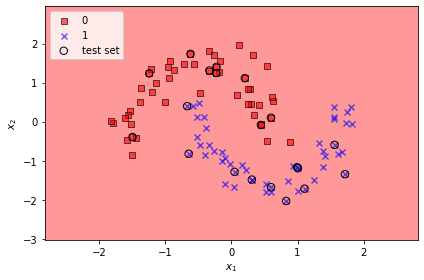

-------------------------------------------------------
C = 1.000000 gamma = 0.001000
Misclassified samples: 11
Accuracy: 0.45


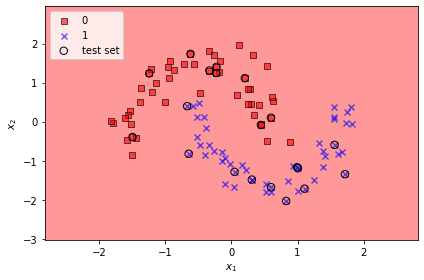

-------------------------------------------------------
C = 1.000000 gamma = 0.010000
Misclassified samples: 3
Accuracy: 0.85


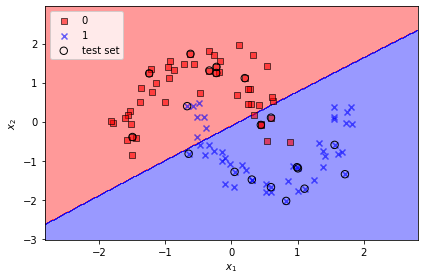

-------------------------------------------------------
C = 1.000000 gamma = 0.100000
Misclassified samples: 3
Accuracy: 0.85


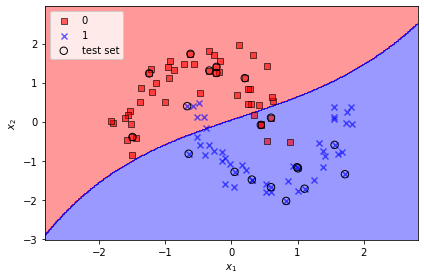

-------------------------------------------------------
C = 1.000000 gamma = 1.000000
Misclassified samples: 0
Accuracy: 1.00


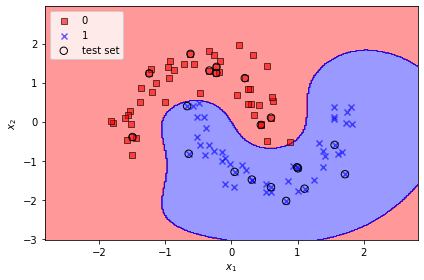

-------------------------------------------------------
C = 10.000000 gamma = 0.000010
Misclassified samples: 11
Accuracy: 0.45


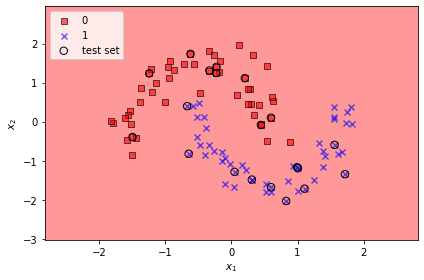

-------------------------------------------------------
C = 10.000000 gamma = 0.000100
Misclassified samples: 11
Accuracy: 0.45


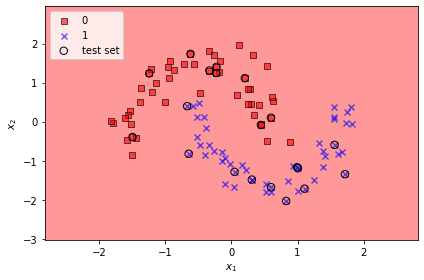

-------------------------------------------------------
C = 10.000000 gamma = 0.001000
Misclassified samples: 3
Accuracy: 0.85


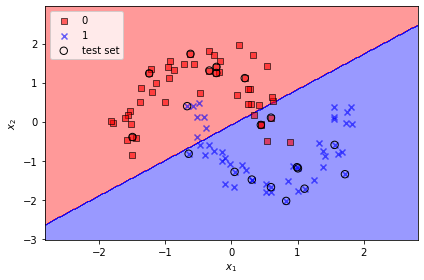

-------------------------------------------------------
C = 10.000000 gamma = 0.010000
Misclassified samples: 3
Accuracy: 0.85


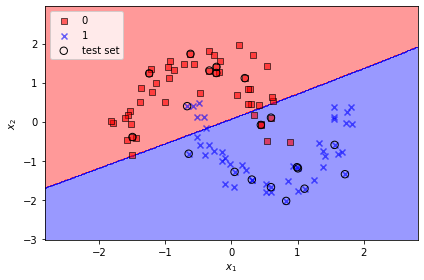

-------------------------------------------------------
C = 10.000000 gamma = 0.100000
Misclassified samples: 3
Accuracy: 0.85


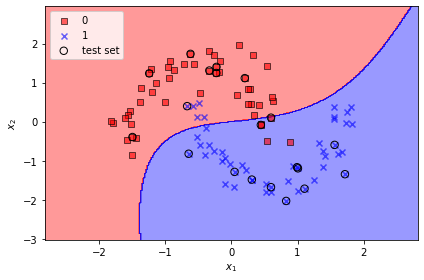

-------------------------------------------------------
C = 10.000000 gamma = 1.000000
Misclassified samples: 0
Accuracy: 1.00


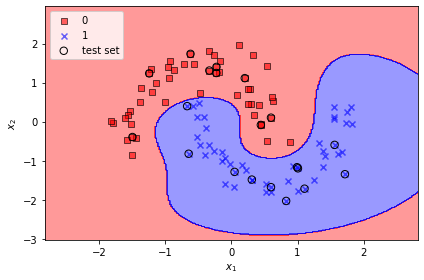

-------------------------------------------------------
C = 100.000000 gamma = 0.000010
Misclassified samples: 11
Accuracy: 0.45


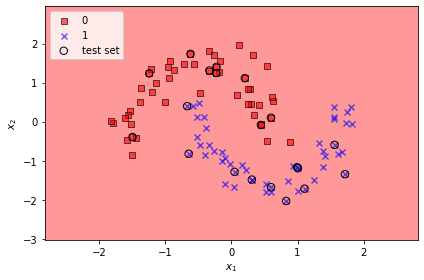

-------------------------------------------------------
C = 100.000000 gamma = 0.000100
Misclassified samples: 3
Accuracy: 0.85


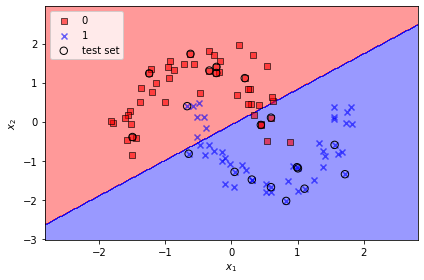

-------------------------------------------------------
C = 100.000000 gamma = 0.001000
Misclassified samples: 3
Accuracy: 0.85


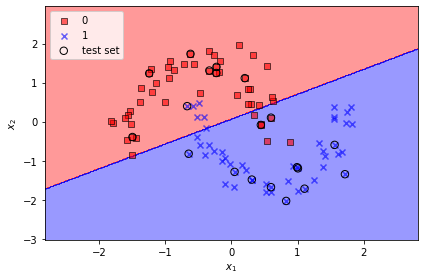

-------------------------------------------------------
C = 100.000000 gamma = 0.010000
Misclassified samples: 3
Accuracy: 0.85


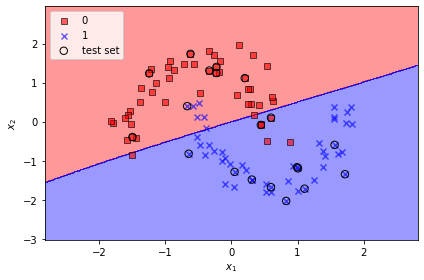

-------------------------------------------------------
C = 100.000000 gamma = 0.100000
Misclassified samples: 1
Accuracy: 0.95


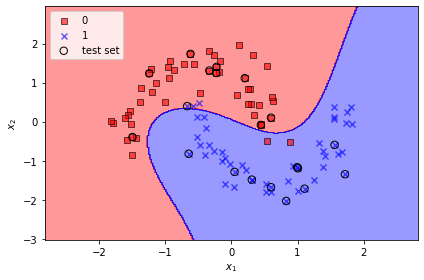

-------------------------------------------------------
C = 100.000000 gamma = 1.000000
Misclassified samples: 0
Accuracy: 1.00


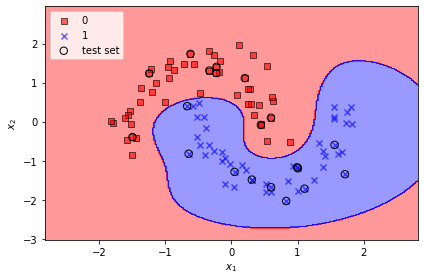

-------------------------------------------------------
C = 1000.000000 gamma = 0.000010
Misclassified samples: 3
Accuracy: 0.85


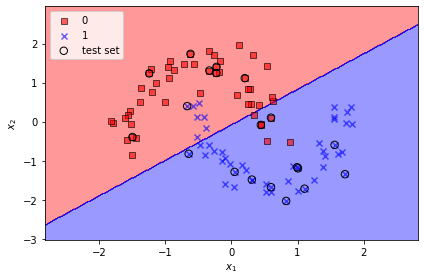

-------------------------------------------------------
C = 1000.000000 gamma = 0.000100
Misclassified samples: 3
Accuracy: 0.85


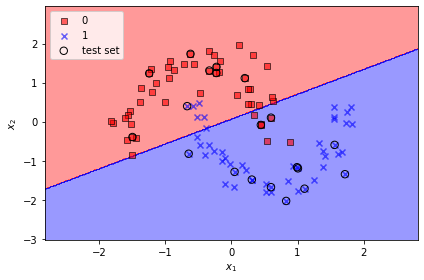

-------------------------------------------------------
C = 1000.000000 gamma = 0.001000
Misclassified samples: 3
Accuracy: 0.85


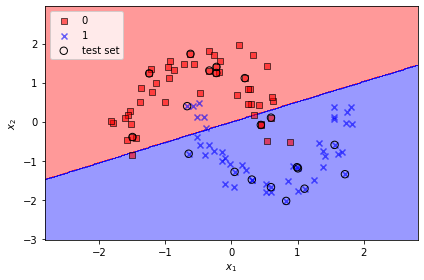

-------------------------------------------------------
C = 1000.000000 gamma = 0.010000
Misclassified samples: 3
Accuracy: 0.85


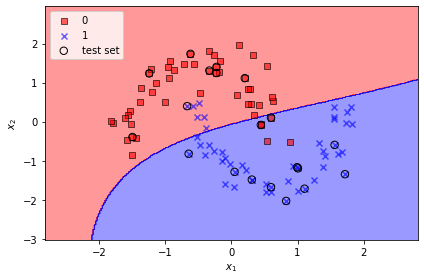

-------------------------------------------------------
C = 1000.000000 gamma = 0.100000
Misclassified samples: 0
Accuracy: 1.00


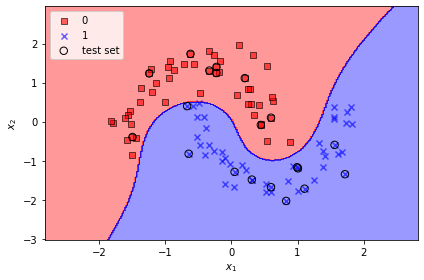

-------------------------------------------------------
C = 1000.000000 gamma = 1.000000
Misclassified samples: 0
Accuracy: 1.00


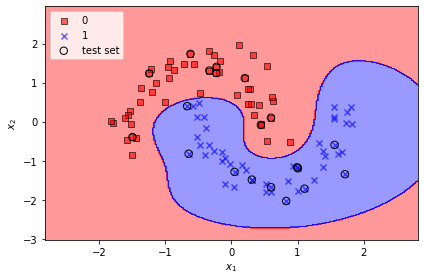

-------------------------------------------------------
C = 10000.000000 gamma = 0.000010
Misclassified samples: 3
Accuracy: 0.85


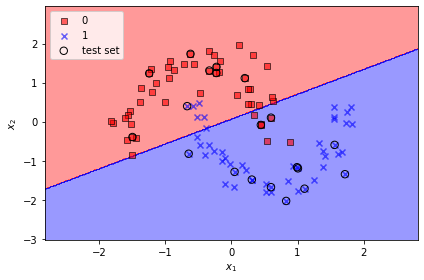

-------------------------------------------------------
C = 10000.000000 gamma = 0.000100
Misclassified samples: 3
Accuracy: 0.85


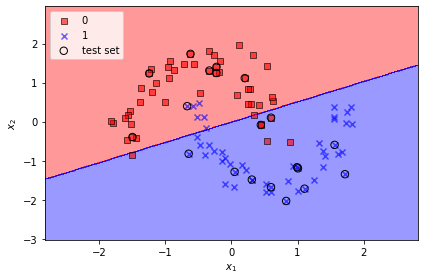

-------------------------------------------------------
C = 10000.000000 gamma = 0.001000
Misclassified samples: 3
Accuracy: 0.85


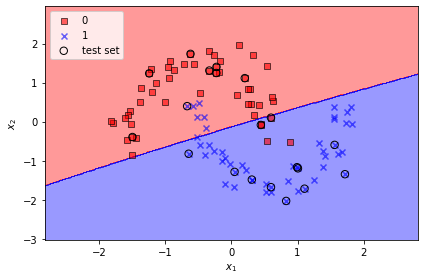

-------------------------------------------------------
C = 10000.000000 gamma = 0.010000
Misclassified samples: 3
Accuracy: 0.85


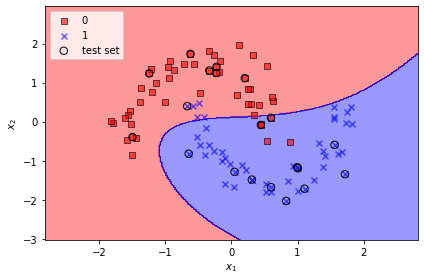

-------------------------------------------------------
C = 10000.000000 gamma = 0.100000
Misclassified samples: 0
Accuracy: 1.00


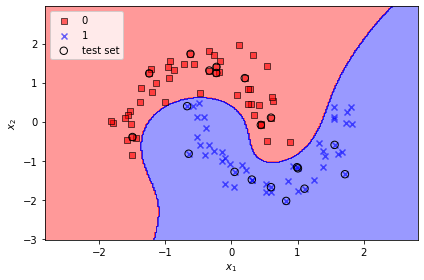

-------------------------------------------------------
C = 10000.000000 gamma = 1.000000
Misclassified samples: 0
Accuracy: 1.00


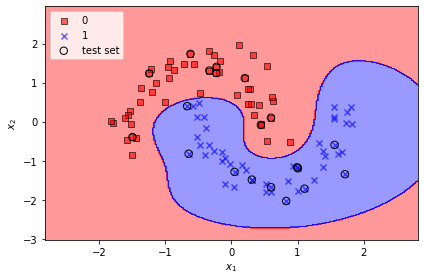

In [13]:
from sklearn.svm import SVC
# 設定C陣列 和 gamma陣列 來達成排列組和
c=[0.1,1.0,10.0,100.0,1000.0,10000.0]
g=[0.00001,0.0001,0.001,0.01,0.1,1.0]

# 紀錄目前最佳解的準確度和對應的參數
a=0
best_combination_x=[]
best_combination_y=[]

#6*6排列組合
for i in range(6):
    for j in range(6):
        print('-------------------------------------------------------')
        print('C = %f' %c[i],'gamma = %f' %g[j])
        
        #設定svm模型
        svm = SVC(C=c[i],gamma=g[j])
        svm.fit(X_train_std, y_train)
        y_pred = svm.predict(X_test_std)
        print('Misclassified samples: %d' % (y_test != y_pred).sum())
        score=accuracy_score(y_test, y_pred)
        print('Accuracy: %.2f' % score)
        
        #如果當前精確度>歷史最高精確度 則更新最佳解
        if score > a :
            best_combination_x.clear()
            best_combination_y.clear()
            best_combination_x.append(c[i])
            best_combination_y.append(g[j])
            a = score
        #如果當前精確度=歷史最高精確度 則把現在的解加入最佳解集合中
        elif score == a :
            best_combination_x.append(c[i])
            best_combination_y.append(g[j])
        # plot decision regions for classifier
        plot_decision_regions(X_combined_std, y_combined,
                              classifier=svm, 
                              test_idx=range(y_train.size,
                                             y_train.size + y_test.size))
        plt.xlabel('$x_1$')
        plt.ylabel('$x_2$')
        plt.legend(loc='upper left')
        plt.tight_layout()
        plt.show()

### (e)印出最佳解:


-------------------------------------------------------
C = 1.000000 gamma = 1.000000
Misclassified samples: 0
Accuracy: 1.00


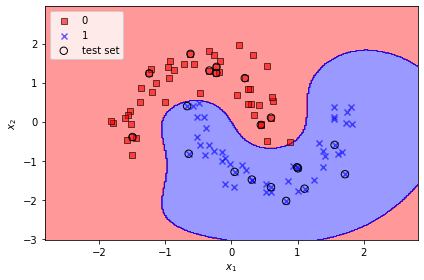

-------------------------------------------------------
C = 10.000000 gamma = 1.000000
Misclassified samples: 0
Accuracy: 1.00


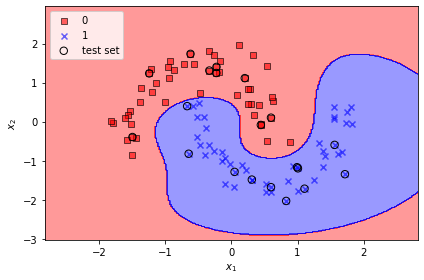

-------------------------------------------------------
C = 100.000000 gamma = 1.000000
Misclassified samples: 0
Accuracy: 1.00


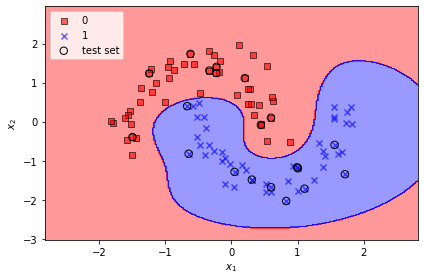

-------------------------------------------------------
C = 1000.000000 gamma = 0.100000
Misclassified samples: 0
Accuracy: 1.00


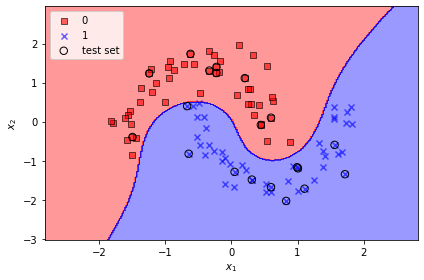

-------------------------------------------------------
C = 1000.000000 gamma = 1.000000
Misclassified samples: 0
Accuracy: 1.00


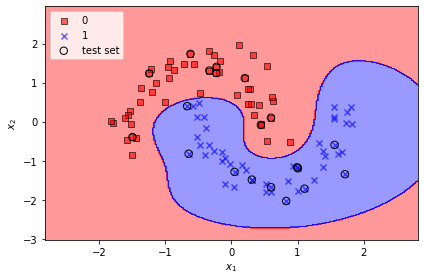

-------------------------------------------------------
C = 10000.000000 gamma = 0.100000
Misclassified samples: 0
Accuracy: 1.00


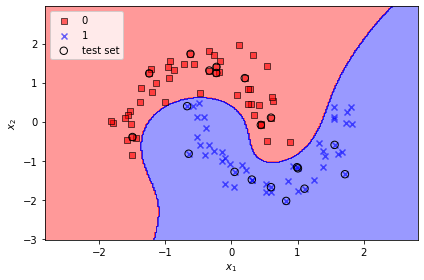

-------------------------------------------------------
C = 10000.000000 gamma = 1.000000
Misclassified samples: 0
Accuracy: 1.00


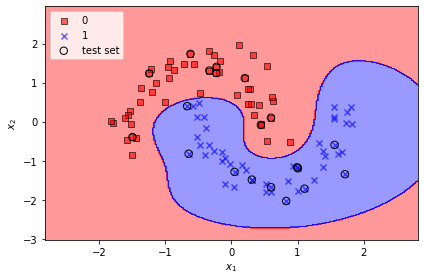

In [14]:
#印出最好的解
for i in range(len(best_combination_x)):
    print('-------------------------------------------------------')
    print('C = %f' %best_combination_x[i],'gamma = %f' %best_combination_y[i])
    svm = SVC(C=best_combination_x[i],gamma=best_combination_y[i])
    svm.fit(X_train_std, y_train)
    y_pred = svm.predict(X_test_std)
    print('Misclassified samples: %d' % (y_test != y_pred).sum())
    score=accuracy_score(y_test, y_pred)
    print('Accuracy: %.2f' % score)
    # plot decision regions for classifier
    plot_decision_regions(X_combined_std, y_combined,
                              classifier=svm, 
                              test_idx=range(y_train.size,
                                             y_train.size + y_test.size))
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

### (f) Logistic Regression :
Please implement Logistic Regression in scikit-learn where C = 1000.0, random state = 0, and solver = ”liblinear”.

[LogisticRegression]
Misclassified samples: 3
Accuracy: 0.85


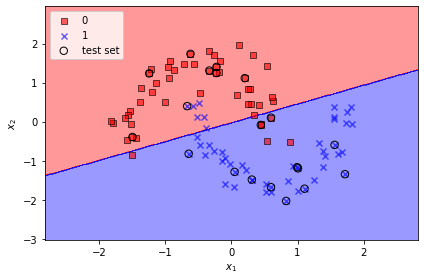

In [15]:
from sklearn.linear_model import LogisticRegression
# 設定LogisticRegression
logisticRegr = LogisticRegression( C=1000.0 , solver = 'liblinear')
logisticRegr.fit(X_train_std, y_train)
y_pred = logisticRegr.predict(X_test_std)
print('[LogisticRegression]')
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

# plot decision regions for LogisticRegression classifier
plot_decision_regions(X_combined_std, y_combined,
                      classifier=logisticRegr, 
                      test_idx=range(y_train.size,
                                     y_train.size + y_test.size))
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()